In [123]:
from sales.filter_data import df_data
import pandas as pd

In [124]:
# Remove contacts columns, I won't need it training this model
df_data = df_data.drop(['Last_Name', 'Area', 'Contact_No', 'Delivery_Schedule', 'P_Status', 'Acc_Status' ], axis=1)

In [125]:
# Data basic stats for overview
df_data.describe()

,Remainder,Delivered,Paid,Balance
count,24158.000000,24158.000000,24158.000000,24158.000000
mean,32.167108,60.291042,511.677747,213.290835
std,202.757825,235.464277,1367.844526,1223.587778
min,0.000000,0.000000,0.000000,-4.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,70.000000,0.000000
75%,1.000000,2.000000,360.000000,0.000000
max,7142.000000,4100.000000,24500.000000,49994.000000


In [126]:

# Change to format that support change to monthly period

df_data['tmp'] = pd.to_datetime(df_data['Acc_Date_Created'], format= ('%Y-%m-%d'))
df_data['Date_Created'] = pd.to_datetime(df_data['tmp'].dt.strftime('%Y-%m-%d'))

In [127]:
df_data = df_data.drop('tmp', axis=1)
df_data.insert(6, 'Acc_Date', df_data['Date_Created'])

In [128]:
# Change to Monthly Period
df_data = df_data.drop('Date_Created', axis=1)
df_data['Acc_Date'] = df_data['Acc_Date'].dt.to_period('M')

In [129]:
# Sum All Numeric values by months
monthly_sales = df_data.groupby('Acc_Date').sum().reset_index()

C:\Users\Mean_Machine\AppData\Local\Temp\ipykernel_10680\3864820276.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sales = df_data.groupby('Acc_Date').sum().reset_index()


In [130]:
monthly_sales.insert(3, 'Quantity', (monthly_sales['Delivered'] + monthly_sales['Remainder']))

In [131]:
# monthly_sales = monthly_sales.drop('Total_Amount', axis=1)
monthly_sales['Total_Amount'] = (monthly_sales['Paid'] + monthly_sales['Balance'])

In [132]:
monthly_sales = monthly_sales.drop(index=0)

In [133]:
monthly_sales['Acc_Date']= monthly_sales['Acc_Date'].dt.to_timestamp()

In [134]:
monthly_sales.describe()

,Remainder,Delivered,Quantity,Paid,Balance,Total_Amount
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,12334.777778,23119.222222,35454.000000,196208.111111,81788.571429,277996.682540
std,18007.273875,24146.108588,37999.845278,182527.501728,98766.650345,260951.686098
min,32.000000,109.000000,199.000000,4370.000000,2520.000000,6890.000000
25%,1961.000000,1951.500000,4139.500000,34375.000000,18955.000000,54342.500000
50%,4259.000000,6033.000000,9283.000000,69840.000000,41043.000000,105390.000000
75%,13572.000000,46555.000000,61959.500000,380343.500000,88266.500000,500670.000000
max,72572.000000,84325.000000,130946.000000,539942.000000,436071.000000,803759.000000


In [135]:
import matplotlib.pyplot as plt 

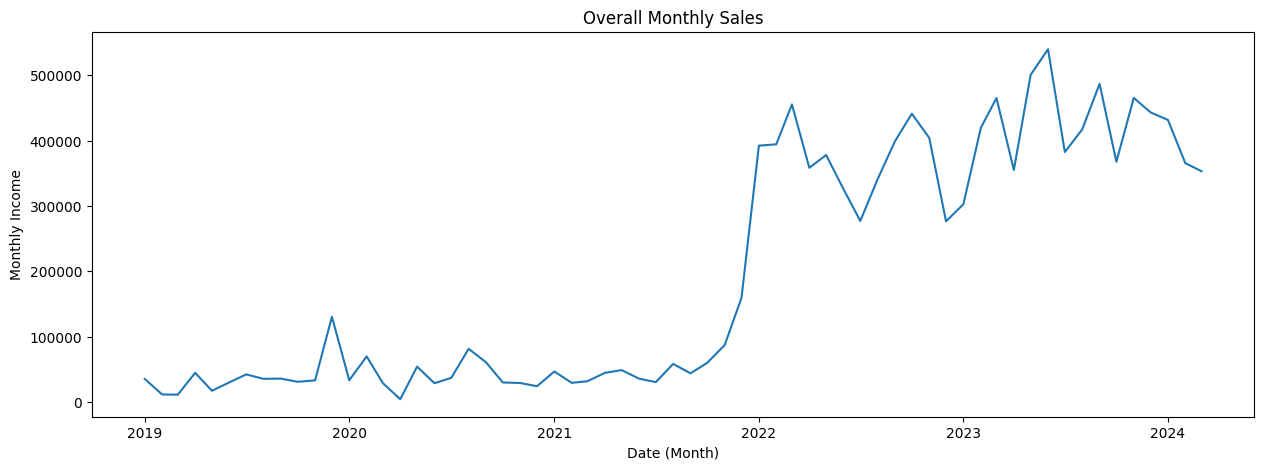

In [136]:
plt.figure(figsize=(15, 5))
plt.plot(monthly_sales['Acc_Date'], monthly_sales['Paid'])
plt.xlabel('Date (Month)')
plt.ylabel('Monthly Income')
plt.title('Overall Monthly Sales')
plt.show()

In [137]:
monthly_sales = monthly_sales.sort_values(by=['Acc_Date'], ascending=True)
monthly_sales['Sales_Diff'] = monthly_sales['Paid'].diff()

In [138]:
monthly_sales.tail(20)

,Acc_Date,Remainder,Delivered,Quantity,Paid,Balance,Total_Amount,Sales_Diff
44,2022-08-01,4973,41770,46743,341306.0,77858.0,419164.0,64151.0
45,2022-09-01,13590,53808,67398,399338.0,131140.0,530478.0,58032.0
46,2022-10-01,6870,49529,56399,441239.0,56346.0,497585.0,41901.0
47,2022-11-01,6788,47883,54671,404356.0,41043.0,445399.0,-36883.0
48,2022-12-01,7108,29824,36932,276612.0,61031.0,337643.0,-127744.0
49,2023-01-01,7080,35817,42897,302800.0,62421.0,365221.0,26188.0
50,2023-02-01,13775,51558,65333,419462.0,84293.0,503755.0,116662.0
51,2023-03-01,9087,56475,65562,465272.0,84497.0,549769.0,45810.0
52,2023-04-01,7006,38785,45791,355113.0,61900.0,417013.0,-110159.0
53,2023-05-01,25309,54344,79653,500763.0,125469.0,626232.0,145650.0


In [139]:
# Checks if it is growing or declining over a period of time
monthly_sales['Sales_Diff'].sum()

317835.0

In [140]:
supervised_data = monthly_sales[['Sales_Diff']].copy()
supervised_data.shape

(63, 1)

In [141]:
# supervised model (data sample)
for i in range(1, 13):
    months_col = f'Month_{i}'
    supervised_data[months_col] = supervised_data['Sales_Diff'].shift(i)
supervised_data = supervised_data.dropna().reset_index(drop=True)
supervised_data.head(10)

,Sales_Diff,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,36460.0,-97075.0,97220.0,2235.0,-4930.0,370.0,-6770.0,12155.0,12875.0,-27485.0,33525.0,-450.0,-23660.0
1,-40860.0,36460.0,-97075.0,97220.0,2235.0,-4930.0,370.0,-6770.0,12155.0,12875.0,-27485.0,33525.0,-450.0
2,-24610.0,-40860.0,36460.0,-97075.0,97220.0,2235.0,-4930.0,370.0,-6770.0,12155.0,12875.0,-27485.0,33525.0
3,49860.0,-24610.0,-40860.0,36460.0,-97075.0,97220.0,2235.0,-4930.0,370.0,-6770.0,12155.0,12875.0,-27485.0
4,-25350.0,49860.0,-24610.0,-40860.0,36460.0,-97075.0,97220.0,2235.0,-4930.0,370.0,-6770.0,12155.0,12875.0
5,8135.0,-25350.0,49860.0,-24610.0,-40860.0,36460.0,-97075.0,97220.0,2235.0,-4930.0,370.0,-6770.0,12155.0
6,44515.0,8135.0,-25350.0,49860.0,-24610.0,-40860.0,36460.0,-97075.0,97220.0,2235.0,-4930.0,370.0,-6770.0
7,-20610.0,44515.0,8135.0,-25350.0,49860.0,-24610.0,-40860.0,36460.0,-97075.0,97220.0,2235.0,-4930.0,370.0
8,-30905.0,-20610.0,44515.0,8135.0,-25350.0,49860.0,-24610.0,-40860.0,36460.0,-97075.0,97220.0,2235.0,-4930.0
9,-830.0,-30905.0,-20610.0,44515.0,8135.0,-25350.0,49860.0,-24610.0,-40860.0,36460.0,-97075.0,97220.0,2235.0


In [142]:
# Train Model

train_data = supervised_data[:-12]
test_data = supervised_data[-12:]

In [143]:
train_data.shape



(38, 13)

In [144]:
test_data.shape

(12, 13)

In [145]:
from sklearn.preprocessing import MinMaxScaler, minmax_scale

scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [146]:
# Data Preprocessing

x_train, y_train = train_data[:,1:], train_data[:,0:1]
x_test, y_test = test_data[:,1:], test_data[:,0:1]

In [147]:
y_train =y_train.ravel()
y_test =y_test.ravel()

In [148]:
sales_data = monthly_sales['Acc_Date'][-12:].reset_index(drop=True)
df_prediction = pd.DataFrame(sales_data)

In [149]:
from sklearn.linear_model import LinearRegression


lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_predicts = lr_model.predict(x_test)

In [150]:
import numpy as np

lr_predicts = lr_predicts.reshape(-1, 1)
lr_predicts_testset = np.concatenate([lr_predicts, x_test], axis=1)
lr_predicts_testset = scaler.inverse_transform(lr_predicts_testset)

In [151]:
result_list = []
actual_sales= monthly_sales['Paid'][-13:].to_list()
for index in range(0, len(lr_predicts_testset)):
    result_list.append(lr_predicts_testset[index][0] + actual_sales[index])
lr_pre_series = pd.Series(result_list, name="Linear Prediction")
df_prediction = df_prediction.merge(lr_pre_series, left_index= True,  right_index= True)
df_prediction

,Acc_Date,Linear Prediction
0,2023-04-01,537485.328568
1,2023-05-01,366342.256351
2,2023-06-01,474324.090242
3,2023-07-01,609605.597361
4,2023-08-01,295592.368779
5,2023-09-01,288223.627991
6,2023-10-01,735847.196855
7,2023-11-01,482876.610547
8,2023-12-01,200707.191140
9,2024-01-01,525717.924292


In [152]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr_mse = np.sqrt(mean_squared_error(df_prediction['Linear Prediction'], monthly_sales['Paid'][-12:]))
lr_mae = np.sqrt(mean_absolute_error(df_prediction['Linear Prediction'], monthly_sales['Paid'][-12:]))
lr_r2 = r2_score(df_prediction['Linear Prediction'], monthly_sales['Paid'][-12:])


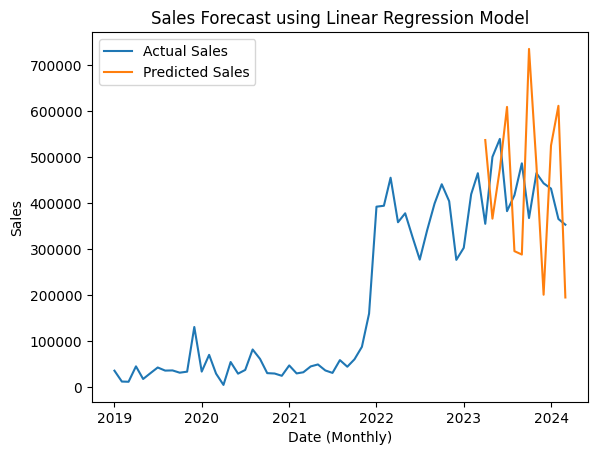

In [153]:
#  Visualisation

# Actual Sales

plt.plot(monthly_sales['Acc_Date'], monthly_sales['Paid'])

# Predicted Sales

plt.plot(df_prediction['Acc_Date'], df_prediction['Linear Prediction'])

# labels

plt.title('Sales Forecast using Linear Regression Model')
plt.xlabel('Date (Monthly)')
plt.ylabel('Sales')
plt.legend(['Actual Sales', 'Predicted Sales'])

plt.show()